In the next exercise you will use the accounts.csv dataset. This dataset contains account details
of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’).
Select the first 8 features and remove duplicates and null values.
Hint: You can use get_dummies() to change the feature type (e.g. pd.get_dummies(data,
drop_first=True)).

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
# Load the data
data = pd.read_csv("accounts.csv", delimiter=',')
# Convert 'deposit' column from 'yes'/'no' to 1/0
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})
# Separate features (X) and target (y)
X = data.drop('deposit', axis=1)
# Remove duplicates and null values
X = X.iloc[:, :8]
X = X.drop_duplicates().dropna()
X.reset_index(drop=True, inplace=True)
data2 = deepcopy(X)


1. Normalize the data using MinMaxScaler:

a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized
data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the
different sum of squared errors (SSE) using the _inertia attribute of k-means
according to the number of clusters.

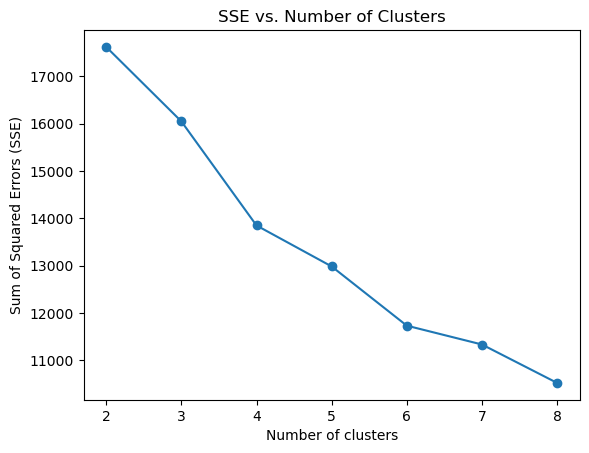

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Convert categorical features to numerical using get_dummies
data1 = pd.get_dummies(X, drop_first=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data1)

# Apply k-means clustering with k={2,3,4,5,6,7,8}
sse = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
import matplotlib.pyplot as plt
plt.plot(range(2, 9), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.show()


b. [1.5v] According to the previous plot, how many underlying customer segments
(clusters) should there be? Explain based on the trade-off between the clusters and
inertia.

No gráfico, vemos uma queda acentuada no SSE de 2 até 6 clusters, com a redução da taxa de diminuição a partir do ponto de 6 clusters. A partir deste ponto, adicionar mais clusters resulta em ganhos menores na redução do SSE. Assim, o número ideal de clusters parece ser 6, pois oferece uma boa divisão dos dados com uma inércia (ou variabilidade intra-cluster) razoável, evitando uma complexidade desnecessária com mais clusters.

c. [1.5v] Would k-modes be a better clustering approach? Explain why based on the
dataset features.

k-modes seria uma melhor opção do que k-means, porque os dados fornecidos apresentam muitas variáveis categóricas e apenas duas variáveis numéricas.
O modelo k-means é bom a operar em modelos numéricos mas tem dificuldades em categorias. O que não acontece com o k-modes sendo assim esta uma melhor opção para avaliar estes dados.

2. Normalize the data using StandardScaler:

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled_standard = scaler.fit_transform(pd.get_dummies(X, drop_first=True))


a. [1v] Apply PCA to the data. How much variability is explained by the top 2
components?

In [10]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_standard)

# Variability explained by the top 2 components
explained_variance = pca.explained_variance_ratio_
print(f"Variability explained by the top 2 components: {explained_variance.sum() * 100:.2f}%")

Variability explained by the top 2 components: 22.76%


b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

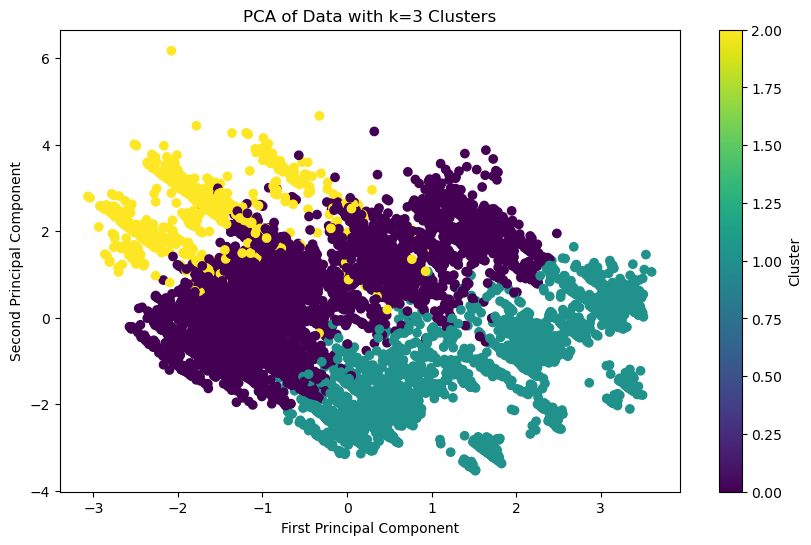

In [11]:
# Apply k-means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, random_state=42)
clusters = kmeans_3.fit_predict(X_scaled_standard)

# Scatter plot of the first 2 principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Data with k=3 Clusters')
plt.colorbar(label='Cluster')
plt.show()

As duas principais componentes explicam aproximadamente 11.68% e 11.08% da variância. Isto significa que os dois juntos contam 22.75% da variância total do modelo.
Conseguimos separar os clusters porque existe uma visível diferença entre a localidade de cada cluster . Isto significa que o pca entre estas características dá-nos uma separação suficiente entre clusters.


c. [2v] Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use sns.displot
(see Data Exploration notebook), with multiple="dodge", stat='density',
shrink=0.8 and common_norm=False. Describe the main differences between the
clusters in no more than half a page.

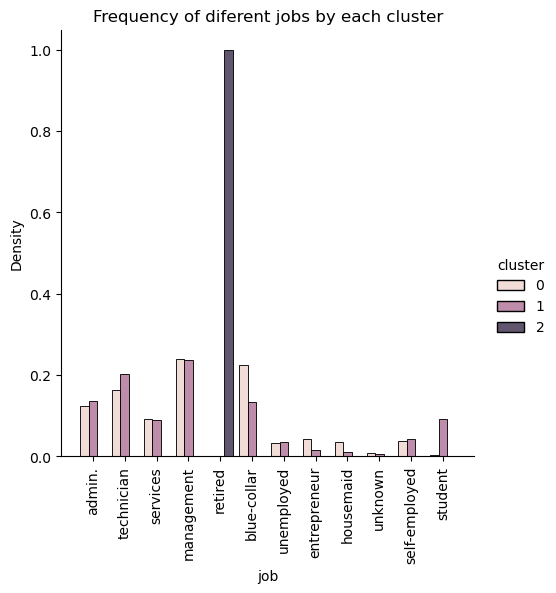

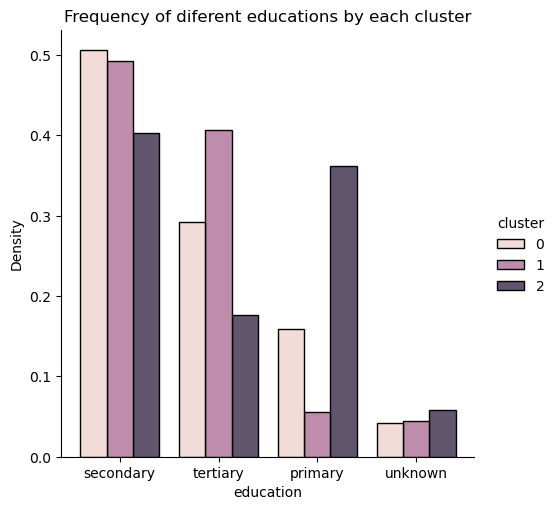

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data2['cluster'] = clusters

sns.displot(data2, x="job", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title('Frequency of diferent jobs by each cluster')
plt.xticks(rotation=90)
plt.show()

sns.displot(data2, x="education", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title('Frequency of diferent educations by each cluster')
plt.show()



Grafico 1 :
  
   - Cluster 0: Apresenta uma distribuição mais equilibrada entre diversas profissões, com destaque para administração,técnicos ,serviços , "blue-collar" , entrepreneurs , housemaid  .
  
   - Cluster 1: Destaca-se pela alta frequência de management e administração, seguido de serviços, técnicos , admin e student.
  
   - Cluster 2: Apresenta uma concentração significativa de pessoas reformadas.
Grafico 2 :
  
   - Cluster 0: Apresenta uma distribuição mais equilibrada entre os níveis de educação, com uma predominância para o ensino secundário. Isso corrobora a hipótese de que este cluster é mais heterogêneo em termos de idade e nível socioeconômico.
  
   - Cluster 1:Destaca-se pela alta frequência de pessoas com ensino terciário e secundário.
  
   - Cluster 2: Apresenta uma concentração significativa de pessoas com ensino primário  e secundário. Isso sugere que este cluster é composto por uma geração mais idosa que não frequentava o ensino terciário .


Tendo em vista a análise dos clusters, podem-se identificar perfis distintos de acordo com a ocupação e o nível educacional, trazendo insights valiosos sobre as características demográficas e socioeconômicas de cada grupo. Para o Cluster 0, tem-se um perfil mais heterogêneo, que varia entre várias profissões e níveis de escolaridade, ainda que sobrepondo ligeiramente as pessoas com ensino secundário completo e terciário. Esse não é o caso do Cluster 1, em que se obtém uma alta concentração de indivíduos em ocupações administrativas, de gestão e um predomínio de pessoas com ensino terciário completo: trata-se, portanto, de um perfil mais qualificado e socioeconomicamente elevado (management e technical).Por fim, o Cluster 2 concentra-se em pessoas reformadas, com uma distribuição educacional centrada no ensino primário, e secundário, reforçando a hipótese de que esse grupo inclui principalmente aqueles fora do mercado de trabalho ativo. Essas distinções ajudam a entender a composição dos grupos e a adaptar estratégias para cada perfil identificado.
